<a href="https://colab.research.google.com/github/hermescosta/Hermes-2025-/blob/main/An%C3%A1lise_de_portf%C3%B3lio_RBras_2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Este estudo teve início no meu primeiro ano da graduação em Bacharelado em Estatística, com o objetivo de aplicar técnicas estatísticas descritivas em um contexto prático e acessível. A análise foi conduzida com foco na visualização e interpretação de dados de um portfólio de ações, permitindo uma compreensão mais intuitiva dos padrões de comportamento dos ativos. O trabalho foi apresentado na RBras 2023, realizada na cidade de Londrina, destacando-se pela abordagem visual e pela capacidade de extrair insights relevantes mesmo com ferramentas estatísticas iniciais.

# **Análise de Portfólio**

# Introdução

No campo da avaliação de investimentos, a compreensão do nível de risco associado a um ativo desempenha um papel fundamental. O risco é um fator crucial na determinação da taxa de desconto utilizada para trazer os fluxos de caixa futuros a valor presente. A taxa de desconto, por sua vez, reflete o risco ao qual o capital investido está exposto em uma empresa, afetando diretamente a avaliação de projetos e a tomada de decisão dos investidores.

No contexto dos investimentos, o risco está intimamente relacionado à probabilidade real de obter um retorno inferior ao esperado. Os investidores, conscientes desse risco, exigem uma taxa de retorno maior para compensar a incerteza e o potencial de perdas. Essa relação positiva entre risco e retorno esperado implica que projetos com maior volatilidade esperada exigiriam um prêmio de risco maior para atrair investidores.


# Objetivo

 Calcular estatísticas descritivas, como volatilidade, matriz de correlação, índice de Sharp e VaR, a fim de ajudar os investidores a compreender os riscos e retornos envolvidos na seleção de uma carteira de investimentos e, assim, minimizar perdas.

 Inicialmente importamos as bilbiotecas necessarias:



*   YFinance: permite acessar dados financeiros do Yahoo Finance diretamente no Python.
*   NumPy: biblioteca para computação numérica.
*   Matplotlib: para visualização gráfica dos dados, permitindo criar gráficos de linha, barras, histogramas...
*   Pandas: manipulação e análise dos dados.
*   Seaborn: biblioteca baseada no Matplotlib que facilita a criação de gráficos estatísticos bonitos e informativos com menos código e integração direta com Pandas.








In [1]:
# importar as bibliotecas
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


# Obtenção dos Dados

O portfólio analisado é composto pelos seguintes ativos da bolsa de valores brasileira: PETR4.SA, VALE3.SA, ITUB4.SA, BBDC4.SA e BBAS3.SA. Para cada um desses ativos, foram coletados os preços históricos de fechamento diário no período de 1º de janeiro de 2022 a 31 de dezembro de 2022. A coleta foi realizada utilizando a biblioteca yfinance, que permite acesso automatizado e direto à base de dados do Yahoo Finance, facilitando o processo de extração e manipulação das séries temporais financeiras.

Definimos abaixo o período de análise, que compreende do início ao fim do ano de 2022.
Essas datas serão utilizadas para filtrar os dados históricos de cada ativo.

In [2]:
# período de tempo
data_inicio = '2022-01-01'
data_fim = '2022-12-31'


Selecionamos os ativos que compõem o portfólio a ser analisado.
 Cada código representa uma ação negociada na B3.

In [3]:
# ações do portfólio
acoes = ['PETR4.SA', 'VALE3.SA', 'ITUB4.SA', 'BBDC4.SA', 'BBAS3.SA']


Utilizamos a função "download" da biblioteca yfinance para obter dados historicos, dos preços de fechamento das ações.

In [4]:
# dados históricos
dados = yf.download(acoes, start=data_inicio, end=data_fim)


/tmp/ipython-input-1658336929.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  dados = yf.download(acoes, start=data_inicio, end=data_fim)
[*********************100%***********************]  5 of 5 completed


Quantidade de linhas e colunas existentes

In [5]:
# linhas e colunas existentes
dados.shape


(250, 25)

Vizualização do inicio DataFrame

In [6]:
# inicio dados
dados.head()


Price           Close                                                   High  \
Ticker       BBAS3.SA   BBDC4.SA   ITUB4.SA   PETR4.SA   VALE3.SA   BBAS3.SA   
Date                                                                           
2022-01-03  10.455670  13.472864  15.589561  10.602619  55.808090  10.796695   
2022-01-04  10.466554  13.561199  16.031668  10.642711  55.149849  10.575391   
2022-01-05  10.292415  13.465313  15.727271  10.230853  55.672150  10.513717   
2022-01-06  10.375856  13.657087  16.046169  10.223564  56.795460  10.470182   
2022-01-07  10.386741  13.855712  16.401297  10.270947  60.101032  10.455671   

Price                                                   ...       Open  \
Ticker       BBDC4.SA   ITUB4.SA   PETR4.SA   VALE3.SA  ...   BBAS3.SA   
Date                                                    ...              
2022-01-03  13.630242  15.806990  10.650001  57.217603  ...  10.568136   
2022-01-04  13.643388  16.075152  10.715606  56.573669  ...  10.564508   
2022-01-05  13.643390  16.104147  10.668225  56.294627  ...  10.455671   
2022-01-06  13.691334  16.118646  10.442250  57.489484  ...  10.310554   
2022-01-07  13.855712  16.415791  10.311039  60.101032  ...  10.379485   

Price                                                     Volume             \
Ticker       BBDC4.SA   ITUB4.SA   PETR4.SA   VALE3.SA  BBAS3.SA   BBDC4.SA   
Date                                                                          
2022-01-03  13.281275  15.343144  10.402157  56.523579  32338600   35620970   
2022-01-04  13.479010  15.669288  10.628131  56.172998  23429600  110060060   
2022-01-05  13.526954  16.009927  10.639067  55.357338  26325600   45808070   
2022-01-06  13.417369  15.683791  10.311039  56.266000  20271000   36651120   
2022-01-07  13.677635  16.009926  10.245433  57.525275  16377400   84778540   

Price                                     
Ticker      ITUB4.SA  PETR4.SA  VALE3.SA  
Date                                      
2022-01-03  36138190  52704700  18557200  
2022-01-04  48343460  51739200  18178700  
2022-01-05  34807190  78459800  22039000  
2022-01-06  39441490  61163100  22044100  
2022-01-07  47174930  47507600  35213100  

[5 rows x 25 columns]

Visualização do final do DataFrame

In [7]:
# final dados
dados.tail()


Price           Close                                                   High  \
Ticker       BBAS3.SA   BBDC4.SA   ITUB4.SA   PETR4.SA   VALE3.SA   BBAS3.SA   
Date                                                                           
2022-12-23  14.349034  11.652059  18.982454  14.665118  67.689163  14.495453   
2022-12-26  14.328699  11.374993  18.605669  14.560032  68.308655  14.466984   
2022-12-27  13.852839  11.321121  18.500160  14.659276  69.939720  14.418177   
2022-12-28  14.100937  11.667450  18.876961  14.478298  69.782890  14.153811   
2022-12-29  14.125340  11.659758  18.839275  14.303159  69.696625  14.251423   

Price                                                   ...       Open  \
Ticker       BBDC4.SA   ITUB4.SA   PETR4.SA   VALE3.SA  ...   BBAS3.SA   
Date                                                    ...              
2022-12-23  11.759805  19.223597  14.723498  67.845994  ...  14.043995   
2022-12-26  11.644361  18.974920  14.770200  68.645846  ...  14.466984   
2022-12-27  11.528918  18.635804  14.776036  70.300436  ...  14.418177   
2022-12-28  11.721323  18.989997  14.781876  70.739573  ...  13.869107   
2022-12-29  11.913732  19.200989  14.624250  70.535682  ...  14.166012   

Price                                                     Volume            \
Ticker       BBDC4.SA   ITUB4.SA   PETR4.SA   VALE3.SA  BBAS3.SA  BBDC4.SA   
Date                                                                         
2022-12-23  11.505830  18.861883  14.087153  66.873630  17488800  21104200   
2022-12-26  11.613576  18.801598  14.665116  67.767579   9105400  13937200   
2022-12-27  11.498134  18.583053  14.741008  69.006561  17731600  78235200   
2022-12-28  11.351906  18.650890  14.653440  69.939727  21450400  45117800   
2022-12-29  11.736720  19.020132  14.589222  69.790727  18673000  41911700   

Price                                     
Ticker      ITUB4.SA  PETR4.SA  VALE3.SA  
Date                                      
2022-12-23  27860030  68387900  18656500  
2022-12-26  17303880  28765200  18407500  
2022-12-27  18923960  50803200  26720300  
2022-12-28  24966040  57293500  23314500  
2022-12-29  27279670  57901800  40110800  

[5 rows x 25 columns]

In [8]:
dados.columns

MultiIndex([( 'Close', 'BBAS3.SA'),
            ( 'Close', 'BBDC4.SA'),
            ( 'Close', 'ITUB4.SA'),
            ( 'Close', 'PETR4.SA'),
            ( 'Close', 'VALE3.SA'),
            (  'High', 'BBAS3.SA'),
            (  'High', 'BBDC4.SA'),
            (  'High', 'ITUB4.SA'),
            (  'High', 'PETR4.SA'),
            (  'High', 'VALE3.SA'),
            (   'Low', 'BBAS3.SA'),
            (   'Low', 'BBDC4.SA'),
            (   'Low', 'ITUB4.SA'),
            (   'Low', 'PETR4.SA'),
            (   'Low', 'VALE3.SA'),
            (  'Open', 'BBAS3.SA'),
            (  'Open', 'BBDC4.SA'),
            (  'Open', 'ITUB4.SA'),
            (  'Open', 'PETR4.SA'),
            (  'Open', 'VALE3.SA'),
            ('Volume', 'BBAS3.SA'),
            ('Volume', 'BBDC4.SA'),
            ('Volume', 'ITUB4.SA'),
            ('Volume', 'PETR4.SA'),
            ('Volume', 'VALE3.SA')],
           names=['Price', 'Ticker'])

In [9]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 250 entries, 2022-01-03 to 2022-12-29
Data columns (total 25 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   (Close, BBAS3.SA)   250 non-null    float64
 1   (Close, BBDC4.SA)   250 non-null    float64
 2   (Close, ITUB4.SA)   250 non-null    float64
 3   (Close, PETR4.SA)   250 non-null    float64
 4   (Close, VALE3.SA)   250 non-null    float64
 5   (High, BBAS3.SA)    250 non-null    float64
 6   (High, BBDC4.SA)    250 non-null    float64
 7   (High, ITUB4.SA)    250 non-null    float64
 8   (High, PETR4.SA)    250 non-null    float64
 9   (High, VALE3.SA)    250 non-null    float64
 10  (Low, BBAS3.SA)     250 non-null    float64
 11  (Low, BBDC4.SA)     250 non-null    float64
 12  (Low, ITUB4.SA)     250 non-null    float64
 13  (Low, PETR4.SA)     250 non-null    float64
 14  (Low, VALE3.SA)     250 non-null    float64
 15  (Open, BBAS3.SA)    250 non-null    fl

In [19]:

# só as colunas numéricas

sns.set_style('darkgrid')

num_cols = dados.select_dtypes(include=['int64', 'float64']).columns
print(len(num_cols), "variáveis numéricas")

25 variáveis numéricas


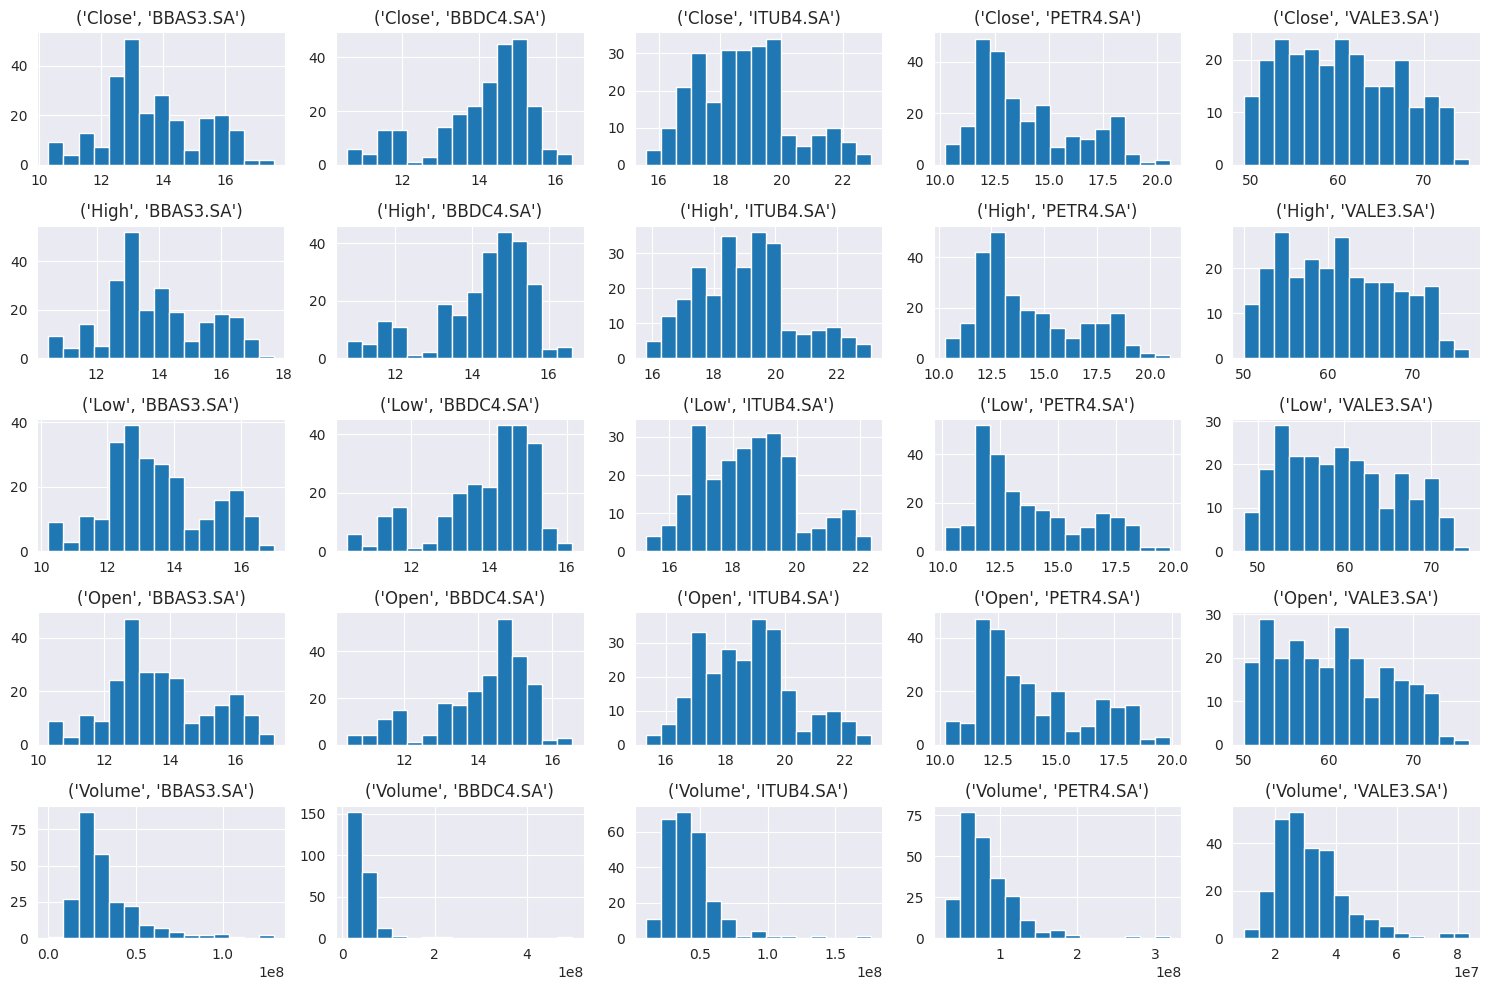

In [20]:
# Plota só as numéricas

dados[num_cols].hist(bins=15, figsize=(15, 10))
plt.tight_layout()
plt.show()

# Análises

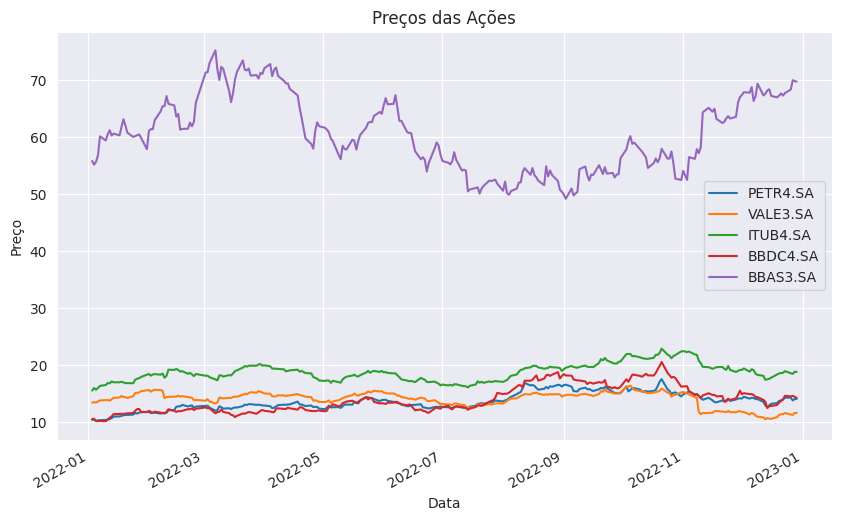

In [11]:
# Gráfico de preços das ações
dados['Close'].plot(title='Preços das Ações', figsize=(10, 6))
plt.ylabel('Preço')
plt.xlabel('Data')
plt.legend(acoes)
plt.show()

Em seguida, calcula-se a variação percentual diária do preço de cada ação, a qual é essencial para os cálculos das estatísticas descritivas

A variação percentual é dada por $ \frac{\text{Preço atual} - \text{Preço anterior}}{\text{Preço anterior}} $.


In [12]:

# Calcular os retornos percentuais diários
retornos = dados['Close'].pct_change()


Podendo ser calculadas a partir do desvio padrão, das variações percentuais diárias de cada ativo, indicando a magnitude da flotação do ativo em um determinado período de tempo, temos a volatilidade e seus respectivos resultados.

In [13]:

# Calcular a volatilidade (desvio padrão) dos retornos
volatilidades = retornos.std()


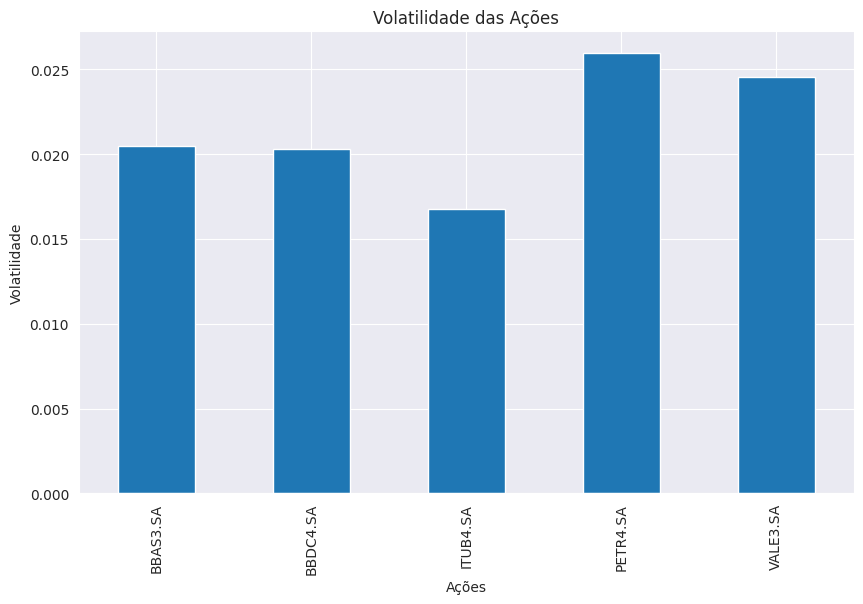

In [14]:
# Gráfico de volatilidade das ações
volatilidades.plot(kind='bar', title='Volatilidade das Ações', figsize=(10, 6))
plt.ylabel('Volatilidade')
plt.xlabel('Ações')
plt.show()



O grau de relacionamento entre duas variáveis, é determinado pelo coeficiente de Pearson, sendo o necessário para o cálculo, da matriz de correlação, a qual, permite uma boa visualização, da existência de uma correlação forte e positiva entre duas variáveis.    


In [15]:

# Calcular a matriz de correlação dos retornos
matriz_correlacao = retornos.corr()


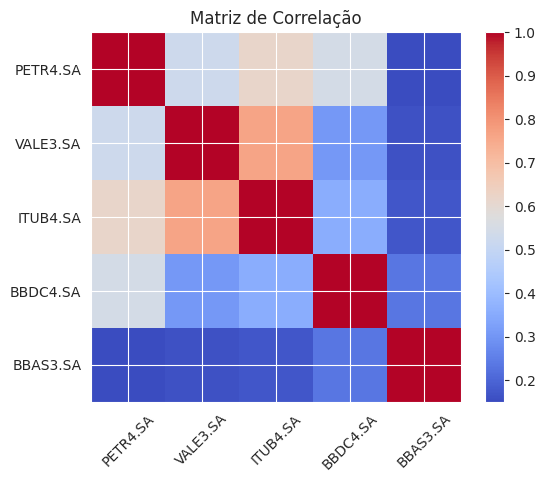

In [16]:
# Gráfico de matriz de correlação
plt.imshow(matriz_correlacao, cmap='coolwarm', interpolation='nearest')
plt.title('Matriz de Correlação')
plt.colorbar()
tick_marks = np.arange(len(acoes))
plt.xticks(tick_marks, acoes, rotation=45)
plt.yticks(tick_marks, acoes)
plt.show()

In [17]:
# Calcular a covariância dos retornos
covariancia = retornos.cov()

# Supondo que você já tenha os pesos das ações em um vetor
pesos = np.array([0.2, 0.2, 0.2, 0.2, 0.2])

risco_sistematico = np.dot(pesos.T, np.dot(covariancia, pesos))
desvio_padrao_combinado = np.sqrt(risco_sistematico)

retorno_esperado = 0.1
retorno_livre_risco = 0.05

sharpe_ratio = (retorno_esperado - retorno_livre_risco) / desvio_padrao_combinado

nivel_confianca = 0.95
horizonte_tempo = 1  # Em dias

var = desvio_padrao_combinado * np.percentile(retornos.sum(axis=1), (1 - nivel_confianca) * 100) * np.sqrt(horizonte_tempo)
print(sharpe_ratio)

3.3038085774033865


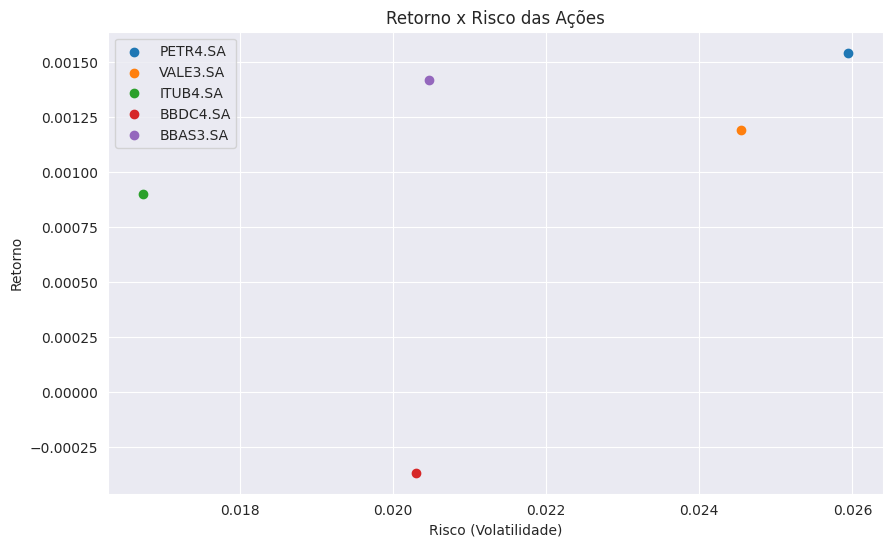

In [18]:
# Calcular a volatilidade (desvio padrão) dos retornos
volatilidades = retornos.std()

# Plotar o gráfico de retorno x risco para cada ação
plt.figure(figsize=(10, 6))
for i in range(len(acoes)):
    retorno = np.mean(retornos[acoes[i]])  # Retorno médio da ação
    risco = volatilidades[acoes[i]]  # Volatilidade da ação
    plt.scatter(risco, retorno, label=acoes[i])

plt.xlabel('Risco (Volatilidade)')
plt.ylabel('Retorno')
plt.title('Retorno x Risco das Ações')
plt.legend()
plt.grid(True)
plt.show()

# Conclusões

Portanto, com essa análise, foi possível evidenciar dentro do portfólio e períodos escolhidos, quais seriam os ativos que teriam uma tendência de comportamento mais parecida e tomar as devidas precações para que o risco do portfólio seja minimizado a fim de obter o maior retorno possível com o menor risco evidente.